
# **1. Installing and Importing dependancies**



In [2]:
!pip install stable-baselines

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.1 MB/s eta 0:00:00
  Attempting uninstall: pygame
    Found existing installation: pygame 2.6.1
    Uninstalling pygame-2.6.1:
      Successfully uninstalled pygame-2.6.1


In [4]:
from stable_baselines.common.atari_wrappers import make_atari, wrap_deepmind
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from google.colab import drive
import gym.wrappers

In [ ]:
# Mount Google Drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# **2. Examining the Breakout environment**

In [ ]:
# 2. Examining the Breakout environment
from ale_py import ALEInterface
ale = ALEInterface()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install gymnasium

In [ ]:
!pip install ale-py


In [ ]:
!pip install gymnasium[atari]


In [ ]:
# Observations (raw)
import gymnasium as gym
import ale_py
import numpy as np

gym.register_envs(ale_py)

In [ ]:
# Observations (raw)
import gymnasium as gym
import ale_py
import numpy as np

gym.register_envs(ale_py)







In [ ]:
obs.shape

(210, 160, 3)

In [ ]:
# Observations (wrapped)
env = gym.make('ALE/Breakout-v5', render_mode='rgb_array')
obs, info = env.reset()

(210, 160, 3)


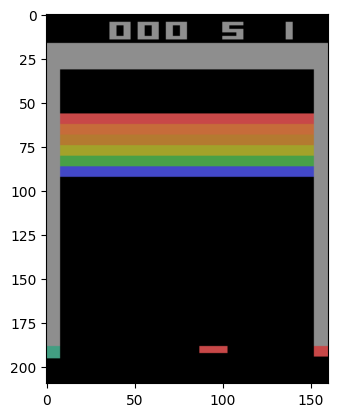

(210, 160, 3)


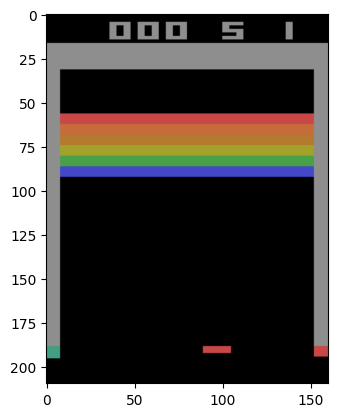

(210, 160, 3)


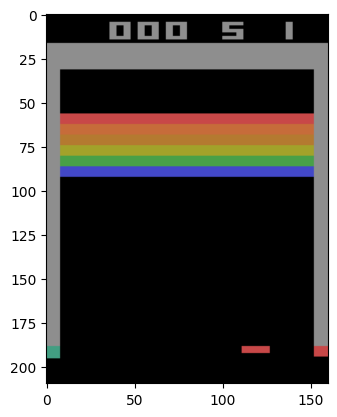

(210, 160, 3)


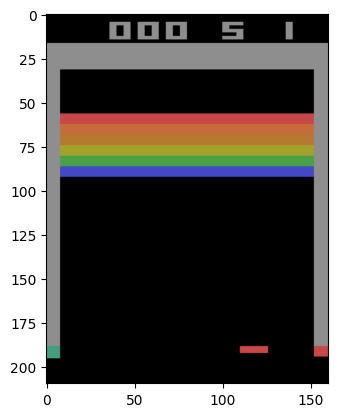

(210, 160, 3)


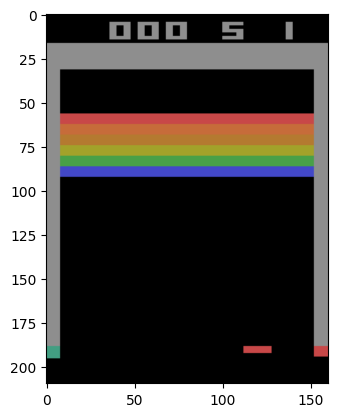

(210, 160, 3)


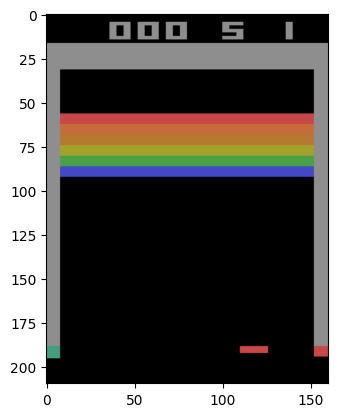

(210, 160, 3)


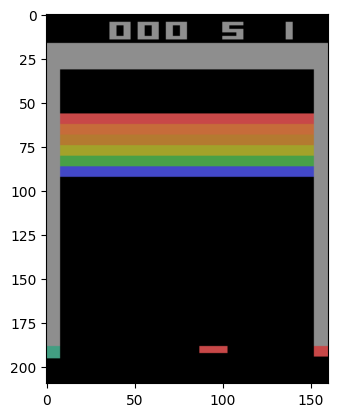

(210, 160, 3)


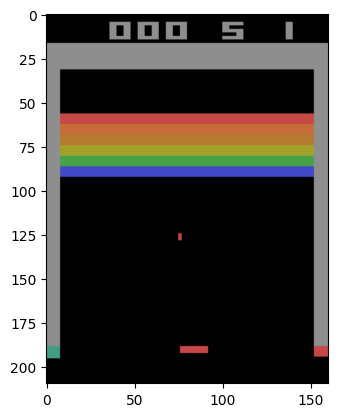

(210, 160, 3)


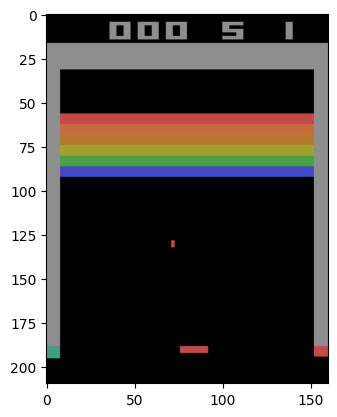

(210, 160, 3)


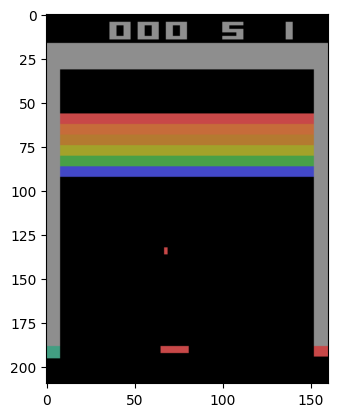

In [ ]:
import gymnasium
import ale_py
import matplotlib.pyplot as plt

gymnasium.register_envs(ale_py)

env = gymnasium.make("ALE/Breakout-v5")
env.reset()
for _ in range(10):
    action = env.action_space.sample()

    obs, reward, terminated, truncated, info = env.step(action)
    print(obs.shape)
    plt.imshow(obs)
    plt.show()

    if terminated or truncated:
        obs, info = env.reset()

env.close()


(210, 160, 3)

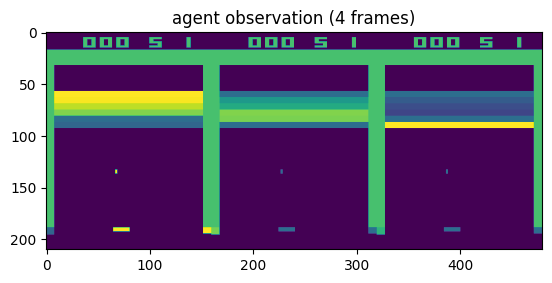

In [ ]:
plt.title("agent observation (4 frames)")
plt.imshow(obs.transpose([0, 2, 1]).reshape([env.observation_space.shape[0], -1]))


In [ ]:
# Actions
print(env.action_space)
print(env.action_space.sample())

Discrete(4)
2


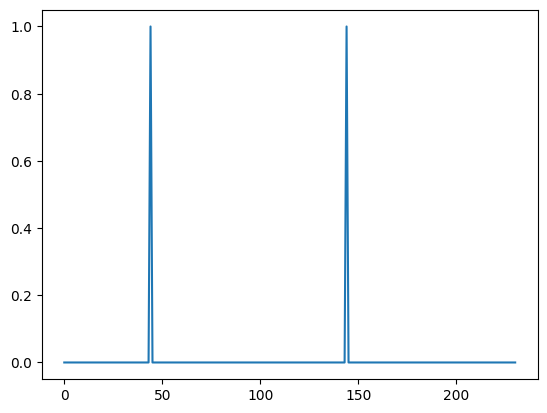

In [ ]:
# Rewards
env.reset()
rewards = []
while True:
    obs, rew, terminated, truncated, info = env.step(env.action_space.sample())  # Unpack into five variables
    rewards.append(rew)
    if terminated or truncated:
        break
plt.plot(rewards)


# **3.Creating model and Coonfiguring hyperparameter: We use the cnnPolicy which basically explore and exploit the environment**


Create A deep Q model and save and train it on 35 000 timesteps

In [ ]:
from stable_baselines3.common.env_util import make_atari_env # Import make_atari_env from the correct module
from stable_baselines3.common.vec_env import VecFrameStack
from stable_baselines3 import DQN

# Create and wrap the Atari environment
env = make_atari_env("ALE/Breakout-v5", n_envs=1, seed=0)
env = VecFrameStack(env, n_stack=4)  # Stack 4 frames to provide temporal context

In [ ]:
# Initialize the DQN model
model = DQN(
    "CnnPolicy",
    env,
    learning_rate=0.0001,
    buffer_size=100000,
    learning_starts=1000,
    batch_size=32,
    target_update_interval=1000,
    train_freq=4,
    gradient_steps=1,
    verbose=1,
)

# Train the model
total_timesteps = 35_000
model.learn(total_timesteps=total_timesteps)


Streaming output truncated to the last 5000 lines.
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.028    |
|    n_updates        | 5517     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 259      |
|    ep_rew_mean      | 2.5      |
|    exploration_rate | 0.781    |
| time/               |          |
|    episodes         | 2648     |
|    fps              | 127      |
|    time_elapsed     | 181      |
|    total_timesteps  | 23099    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0178   |
|    n_updates        | 5524     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 258      |
|    ep_rew_mean      | 2.48     |
|    exploration_rate | 0.78     |
| time/               |          |
|    episodes         | 2652     |
|   

KeyboardInterrupt: 

In [ ]:
model_path = "/content/gdrive/MyDrive/Breakout_DQN_model"

# **Saving the model**

In [ ]:
# Save the trained model

model.save(model_path)
print(f"Model saved at {model_path}")


# **Evaluating the model using evaluate** **policy**

In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy

# Evaluate the model
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10, render=True)
print(f"Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

# Close the environment
env.close()


Mean reward: 9.80 +/- 2.52


# **Loading back the model**

In [ ]:
model_path = "/content/gdrive/MyDrive/Breakout_DQN_model"

In [ ]:
import gymnasium as gym
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from stable_baselines3.common.atari_wrappers import AtariWrapper
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the environment
env = gym.make("ALE/Breakout-v5", render_mode="rgb_array")
env = AtariWrapper(env)  # Preprocess (resize, grayscale, etc.)
env = DummyVecEnv([lambda: env])  # Wrap in DummyVecEnv for vectorized compatibility
env = VecFrameStack(env, n_stack=4)  # Stack 4 frames



# Load the trained model
loaded_model = DQN.load(model_path)
print("Trained model loaded successfully!")

# Initialize variables to store frames
frames = []

# Play the game and collect frames
obs = env.reset()
for _ in range(50):  # Adjust the number of steps to collect more frames
    action, _ = loaded_model.predict(obs, deterministic=True)

    # Step in the environment
    obs, reward, terminated, info = env.step(action)

    # Append the current frame for plotting
    rendered_frame = env.render(mode="rgb_array")[0]  # Extract frame from VecEnv
    frames.append(rendered_frame)

    if terminated :
        obs = env.reset()

env.close()

# Adjust frame size for better visualization
resized_frames = [np.array(frame) for frame in frames]


Trained model loaded successfully!


In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow as tf

model_name = 'breakout_progress'
path = F"/content/{model_name}"

# Load the model using TFSMLayer for SavedModel format
model = tf.keras.layers.TFSMLayer(path, call_endpoint='serving_default')

# If you need a full Keras model, you can wrap the layer
# For example, if the original model had a single output:
# inputs = tf.keras.Input(shape=...)
# outputs = model(inputs)
# model = tf.keras.Model(inputs=inputs, outputs=outputs)
# Use the model for inference
print(model)


<TFSMLayer name=tfsm_layer_1, built=True>
